# Explore Dataset

## Open University Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
assessments_data_frame = pd.read_csv('../datasets/anonymisedOUDataSet/assessments.csv')
courses_data_frame = pd.read_csv('../datasets/anonymisedOUDataSet/courses.csv')
student_assessments_data_frame = pd.read_csv('../datasets/anonymisedOUDataSet/studentAssessment.csv')
student_info_data_frame = pd.read_csv('../datasets/anonymisedOUDataSet/studentInfo.csv')
student_registration_data_frame = pd.read_csv('../datasets/anonymisedOUDataSet/studentRegistration.csv')
student_vle_data_frame = pd.read_csv('../datasets/anonymisedOUDataSet/studentVle.csv')
vle_data_frame = pd.read_csv('../datasets/anonymisedOUDataSet/vle.csv')

sa_days_deadline_df = pd.read_csv('../datasets/StudentAssessmentDaysDeadline.csv')

sns.set(rc={'figure.figsize':(11.7,8.27)})

### Assessments

* code_module – identification code of the module, to which the assessment belongs.
* code_presentation - identification code of the presentation, to which the assessment belongs.
* id_assessment – identification number of the assessment.
* assessment_type – type of assessment. Three types of assessments exist: Tutor Marked Assessment (TMA), Computer Marked Assessment (CMA) and Final Exam (Exam).
* date – information about the final submission date of the assessment calculated as the number of days since the start of the module-presentation. The starting date of the presentation has number 0 (zero).
* weight - weight of the assessment in %. Typically, Exams are treated separately and have the weight 100%; the sum of all other assessments is 100%.

If the information about the final exam date is missing, it is at the end of the last presentation week.

In [5]:
assessments_data_frame.loc[assessments_data_frame["id_assessment"]==24282]

,code_module,code_presentation,id_assessment,assessment_type,date,weight
58,CCC,2014B,24282,TMA,32.0,9.0


In [6]:
assessments_data_frame.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [7]:
assessments_data_frame.count()

code_module          206
code_presentation    206
id_assessment        206
assessment_type      206
date                 195
weight               206
dtype: int64

### Courses

* code_module – code name of the module, which serves as the identifier.
* code_presentation – code name of the presentation. It consists of the year and “B” for the presentation starting in February and “J” for the presentation starting in October.
* length - length of the module-presentation in days.

The structure of B and J presentations may differ and therefore it is good practice to analyse the B and J presentations separately. Nevertheless, for some presentations the corresponding previous B/J presentation do not exist and therefore the J presentation must be used to inform the B presentation or vice versa. In the dataset this is the case of CCC, EEE and GGG modules.

In [8]:
courses_data_frame.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [9]:
courses_data_frame.count()

code_module                   22
code_presentation             22
module_presentation_length    22
dtype: int64

### Student Assessments

* id_assessment – the identification number of the assessment.
* id_student – a unique identification number for the student.
* date_submitted – the date of student submission, measured as the number of days since the start of the module presentation.
* is_banked – a status flag indicating that the assessment result has been transferred from a previous presentation.
* score – the student’s score in this assessment. The range is from 0 to 100. The score lower than 40 is interpreted as Fail. The marks are in the range from 0 to 100.

In [10]:
assessments_data_frame.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [11]:
assessments_date_df = assessments_data_frame[["id_assessment","date"]]
assessments_date_df.set_index('id_assessment', inplace=True)

In [12]:
assessments_date_df.head()#.loc[assessments_date_df["id_assessment"] == 1752]

#student_vle_data_frame.loc[student_vle_data_frame["id_student"]==28400]

,date
id_assessment,
1752,19.0
1753,54.0
1754,117.0
1755,166.0
1756,215.0


In [13]:
student_assessments_data_frame.count()#['days_deadline'] = 0

id_assessment     173912
id_student        173912
date_submitted    173912
is_banked         173912
score             173739
dtype: int64

In [14]:
# student_assessments_data_frame['days_deadline'] = 0
# len_df = len(student_assessments_data_frame)
# for i in range(len_df):
#     #student_assessments_data_frame.insert(i,'days_deadline', assessments_date_df.loc[student_assessments_data_frame["id_assessment"]].iloc[i] - student_assessments_data_frame["date_submitted"].iloc[i] )
#     temp = assessments_date_df.loc[student_assessments_data_frame["id_assessment"]].iloc[i] - student_assessments_data_frame["date_submitted"].iloc[i]   
#     student_assessments_data_frame['days_deadline'].iloc[i] = temp[0]

sa_days_deadline_df.head(-1)

,id_assessment,id_student,date_submitted,is_banked,score,days_deadline
0,1752,11391,18,0,78.0,1.0
1,1752,28400,22,0,70.0,-3.0
2,1752,31604,17,0,72.0,2.0
3,1752,32885,26,0,69.0,-7.0
4,1752,38053,19,0,79.0,0.0
...,...,...,...,...,...,...
173906,37443,521631,229,0,20.0,0.0
173907,37443,527538,227,0,60.0,2.0
173908,37443,534672,229,0,100.0,0.0
173909,37443,546286,215,0,80.0,14.0


### Scores for each assessment

In [13]:
temp = student_assessments_data_frame.groupby(by=["id_assessment"])["score"].describe()

In [14]:
temp

,count,mean,std,min,25%,50%,75%,max
id_assessment,,,,,,,,
1752,358.0,70.307263,11.666251,11.0,63.00,72.0,79.0,94.0
1753,342.0,66.801170,12.955199,15.0,59.00,68.0,76.0,95.0
1754,330.0,70.439394,12.197126,0.0,63.25,73.0,80.0,95.0
1755,303.0,70.567657,12.738631,30.0,64.00,73.0,80.0,94.0
1756,298.0,69.127517,13.387913,25.0,62.00,71.0,79.0,98.0
...,...,...,...,...,...,...,...,...
37439,504.0,86.071429,16.932883,20.0,80.00,100.0,100.0,100.0
37440,479.0,84.308977,19.379618,0.0,80.00,88.0,100.0,100.0
37441,473.0,91.923890,14.493516,0.0,80.00,100.0,100.0,100.0


In [15]:
student_assessments_data_frame.head()

,days_deadline,id_assessment,id_student,date_submitted,is_banked,score
0,1.0,1752,11391,18,0,78.0
1,1.0,1752,28400,22,0,70.0
2,1.0,1752,31604,17,0,72.0
3,1.0,1752,32885,26,0,69.0
4,1.0,1752,38053,19,0,79.0


In [16]:
student_assessments_data_frame

,days_deadline,id_assessment,id_student,date_submitted,is_banked,score
0,1.0,1752,11391,18,0,78.0
1,1.0,1752,28400,22,0,70.0
2,1.0,1752,31604,17,0,72.0
3,1.0,1752,32885,26,0,69.0
4,1.0,1752,38053,19,0,79.0
...,...,...,...,...,...,...
173907,1.0,37443,527538,227,0,60.0
173908,1.0,37443,534672,229,0,100.0
173909,1.0,37443,546286,215,0,80.0
173910,1.0,37443,546724,230,0,100.0


In [69]:
id_ass_submitted_mean = sa_days_deadline_df.groupby(by=["id_assessment"])["days_deadline"].mean().round(0)

In [70]:
id_ass_submitted_mean.describe()

count    185.000000
mean      15.751351
std       34.970062
min       -6.000000
25%        0.000000
50%        1.000000
75%        7.000000
max      167.000000
Name: days_deadline, dtype: float64

C:\Users\rober\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='days_deadline', ylabel='count'>

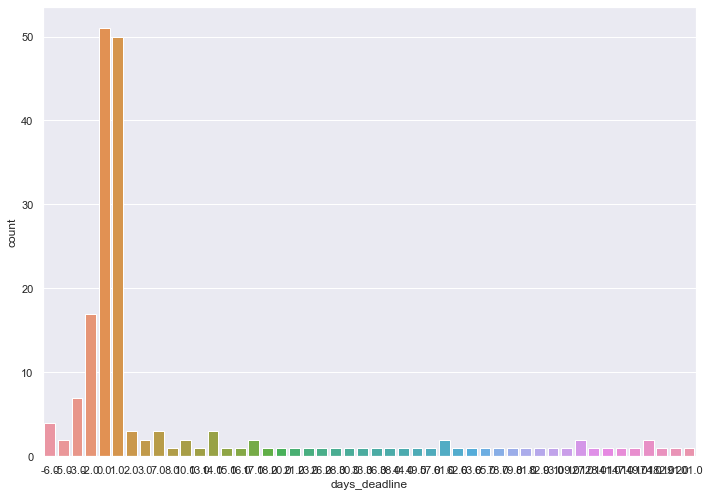

In [68]:
sns.countplot(id_ass_submitted_mean)

In [20]:
id_ass_24282 = student_assessments_data_frame.loc[student_assessments_data_frame["id_assessment"]==24282]

C:\Users\rober\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='date_submitted', ylabel='count'>

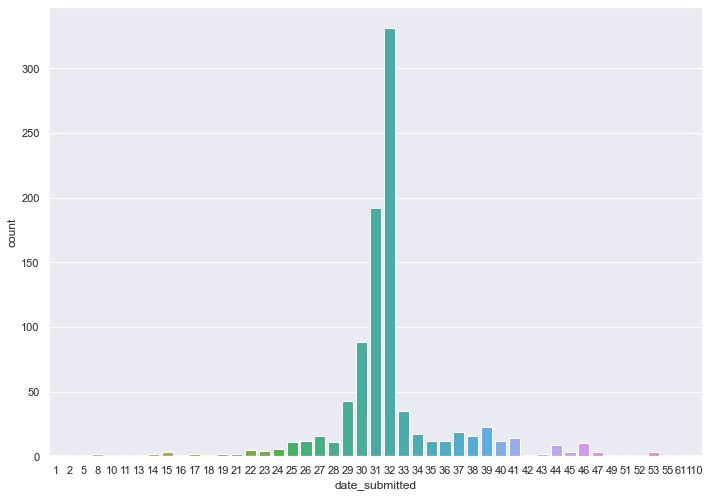

In [21]:
sns.countplot(id_ass_24282.date_submitted)

In [22]:
student_assessments_data_frame.loc[student_assessments_data_frame["id_student"]==592939]

,days_deadline,id_assessment,id_student,date_submitted,is_banked,score
46700,1.0,24282,592939,32,0,86.0
47570,1.0,24283,592939,103,0,47.0
49916,1.0,24286,592939,20,0,20.0
50486,1.0,24287,592939,69,0,76.0
132409,1.0,34886,592939,24,0,88.0
133914,1.0,34887,592939,52,0,68.0
134982,1.0,34888,592939,90,0,57.0
135496,1.0,34889,592939,142,0,NaN
142615,1.0,34899,592939,23,0,58.0
144787,1.0,34900,592939,52,0,76.0


In [23]:
student_assessments_data_frame.head()

,days_deadline,id_assessment,id_student,date_submitted,is_banked,score
0,1.0,1752,11391,18,0,78.0
1,1.0,1752,28400,22,0,70.0
2,1.0,1752,31604,17,0,72.0
3,1.0,1752,32885,26,0,69.0
4,1.0,1752,38053,19,0,79.0


In [24]:
student_assessments_data_frame.count()

days_deadline     173912
id_assessment     173912
id_student        173912
date_submitted    173912
is_banked         173912
score             173739
dtype: int64

### Student Info

* code_module – an identification code for a module on which the student is registered.
* code_presentation - the identification code of the presentation during which the student is registered on the module.
* id_student – a unique identification number for the student.
* gender – the student’s gender.
* region – identifies the geographic region, where the student lived while taking the module-presentation.
* highest_education – highest student education level on entry to the module presentation.
* imd_band – specifies the Index of Multiple Depravation band of the place where the student lived during the module-presentation.
* age_band – band of the student’s age.
* num_of_prev_attempts – the number times the student has attempted this module.
* studied_credits – the total number of credits for the modules the student is currently studying.
* disability – indicates whether the student has declared a disability.
* final_result – student’s final result in the module-presentation.

### Student Taking Multiple Courses

In [25]:
counts = student_info_data_frame['id_student'].value_counts()
student_info_data_frame[student_info_data_frame['id_student'].isin(counts.index[counts > 3])]

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
1042,BBB,2013B,387276,F,North Western Region,Lower Than A Level,50-60%,35-55,1,180,N,Withdrawn
1788,BBB,2013B,542562,F,South East Region,A Level or Equivalent,60-70%,0-35,0,150,Y,Withdrawn
2822,BBB,2013J,387276,F,North Western Region,Lower Than A Level,50-60%,35-55,2,120,N,Withdrawn
3277,BBB,2013J,542562,F,South East Region,A Level or Equivalent,60-70%,0-35,1,270,Y,Withdrawn
4961,BBB,2014B,387276,F,North Western Region,Lower Than A Level,50-60%,35-55,3,120,N,Withdrawn
...,...,...,...,...,...,...,...,...,...,...,...,...
27834,FFF,2014J,279883,M,East Midlands Region,A Level or Equivalent,0-10%,0-35,0,180,N,Withdrawn
28322,FFF,2014J,591655,M,North Region,Lower Than A Level,70-80%,0-35,1,90,N,Fail
28330,FFF,2014J,592939,M,Scotland,HE Qualification,0-10%,0-35,2,90,N,Pass
30048,FFF,2014J,2681198,M,East Anglian Region,Lower Than A Level,70-80%,35-55,0,90,N,Pass


In [26]:
student_info_data_frame.loc[student_info_data_frame["id_student"]==592939]



,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
9690,CCC,2014B,592939,M,Scotland,HE Qualification,0-10%,0-35,0,240,N,Withdrawn
25416,FFF,2013J,592939,M,Scotland,HE Qualification,0-10%,0-35,0,240,N,Withdrawn
26767,FFF,2014B,592939,M,Scotland,HE Qualification,0-10%,0-35,1,240,N,Withdrawn
28330,FFF,2014J,592939,M,Scotland,HE Qualification,0-10%,0-35,2,90,N,Pass


C:\Users\rober\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


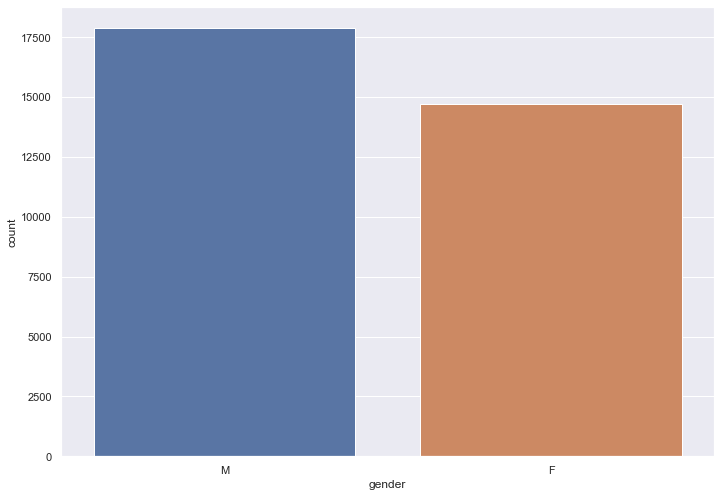

In [27]:
sns.countplot(student_info_data_frame.gender);    #this shows that courses data is almost equally distributed on gender

C:\Users\rober\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


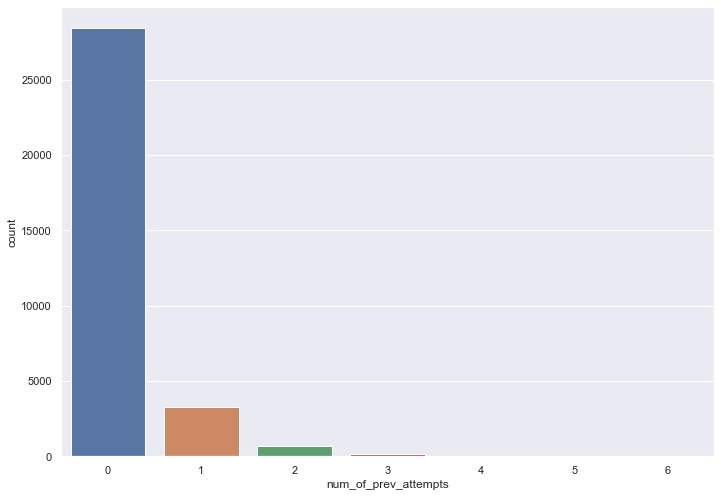

In [28]:
sns.countplot(student_info_data_frame.num_of_prev_attempts);

In [29]:
student_info_data_frame.head(10)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
5,AAA,2013J,38053,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,N,Pass
6,AAA,2013J,45462,M,Scotland,HE Qualification,30-40%,0-35,0,60,N,Pass
7,AAA,2013J,45642,F,North Western Region,A Level or Equivalent,90-100%,0-35,0,120,N,Pass
8,AAA,2013J,52130,F,East Anglian Region,A Level or Equivalent,70-80%,0-35,0,90,N,Pass
9,AAA,2013J,53025,M,North Region,Post Graduate Qualification,NaN,55<=,0,60,N,Pass


In [30]:
student_info_data_frame.count()

code_module             32593
code_presentation       32593
id_student              32593
gender                  32593
region                  32593
highest_education       32593
imd_band                31482
age_band                32593
num_of_prev_attempts    32593
studied_credits         32593
disability              32593
final_result            32593
dtype: int64

### Student Registration

* code_module – an identification code for a module.
* code_presentation - the identification code of the presentation.
* id_student – a unique identification number for the student.
* date_registration – the date of student’s registration on the module presentation, this is the number of days measured relative to the start of the module-presentation (e.g. the negative value -30 means that the student registered to module presentation 30 days before it started).
* date_unregistration – date of student unregistration from the module presentation, this is the number of days measured relative to the start of the module-presentation. Students, who completed the course have this field empty. Students who unregistered have Withdrawal as the value of the final_result column in the studentInfo.csv file.

In [31]:
student_registration_data_frame.loc[student_registration_data_frame["id_student"]==65002]


,code_module,code_presentation,id_student,date_registration,date_unregistration
15,AAA,2013J,65002,-180.0,96.0
395,AAA,2014J,65002,-144.0,NaN


In [32]:
student_registration_data_frame.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


### Student VLE

* code_module – an identification code for a module.
* code_presentation - the identification code of the module presentation.
* id_student – a unique identification number for the student.
* id_site - an identification number for the VLE material.
* date – the date of student’s interaction with the material measured as the number of days since the start of the module-presentation.
* sum_click – the number of times a student interacts with the material in that day.

In [33]:
student_vle_data_frame.loc[student_vle_data_frame["id_student"]==65002].groupby(by=["code_presentation","id_student"])["sum_click"].sum()

code_presentation  id_student
2013J              65002         171
2014J              65002           5
Name: sum_click, dtype: int64

In [34]:
student_vle_data_frame.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


### VLE

* id_site – an identification number of the material.
* code_module – an identification code for module.
* code_presentation - the identification code of presentation.
* activity_type – the role associated with the module material.
* week_from – the week from which the material is planned to be used.
* week_to – week until which the material is planned to be used.

In [35]:
vle_data_frame.head()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


In [36]:
vle_data_frame.count()

id_site              6364
code_module          6364
code_presentation    6364
activity_type        6364
week_from            1121
week_to              1121
dtype: int64

In [37]:
vle_data_frame['activity_type'].unique()

array(['resource', 'oucontent', 'url', 'homepage', 'subpage', 'glossary',
       'forumng', 'oucollaborate', 'dataplus', 'quiz', 'ouelluminate',
       'sharedsubpage', 'questionnaire', 'page', 'externalquiz', 'ouwiki',
       'dualpane', 'repeatactivity', 'folder', 'htmlactivity'],
      dtype=object)

### Basic Statistics

In [38]:
df_course_stats = pd.DataFrame(student_info_data_frame.groupby(['code_module','code_presentation'], as_index=False).size(), columns=['student_count'])

In [39]:
# Student count in each course
df_course_stats

student_count
code_module code_presentation               
AAA         2013J                        383
            2014J                        365
BBB         2013B                       1767
            2013J                       2237
            2014B                       1613
            2014J                       2292
CCC         2014B                       1936
            2014J                       2498
DDD         2013B                       1303
            2013J                       1938
            2014B                       1228
            2014J                       1803
EEE         2013J                       1052
            2014B                        694
            2014J                       1188
FFF         2013B                       1614
            2013J                       2283
            2014B                       1500
            2014J                       2365
GGG         2013J                        952
            2014B                        833
            2014J                        749

#### Average score for each student


In [40]:
temp = student_assessments_data_frame.groupby(["id_student"], as_index=False)
mean_df = pd.DataFrame(temp["score"].mean())


In [41]:
mean_df

,id_student,score
0,6516,61.800000
1,8462,87.000000
2,11391,82.000000
3,23629,82.500000
4,23698,74.444444
...,...,...
23364,2698251,58.142857
23365,2698257,67.800000
23366,2698535,39.250000
23367,2698577,64.400000


In [42]:
student_vle_data_frame.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


#### Sum clicks for each student in resource type

In [43]:
temp = student_vle_data_frame.loc[student_vle_data_frame["id_student"]==28400]
temp = 
#df_ass.loc[df_ass['assessment_name'] == assessment_name]


SyntaxError: invalid syntax (<ipython-input-43-6ceb8cd9bab3>, line 2)

In [ ]:
student_vle_data_frame.loc[student_vle_data_frame["id_student"]==28400]